In [1]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd drive/MyDrive/TechLabs/project/flight_delay_kaggle

/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle


#Flight Delay Prediction

Classification - Is the flight delayed acceptable or unacceptable?

Environment setup: import libraries and load the dataset
Data Analysis: understand the meaning and the predictive power of the variables
Feature Selection: evaluate and keep only the most relevant variables
Preprocessing: encode categorical variables and partition the dataset for training, tuning and testing
Model design: train, tune and test various models
Performance evaluation: evaluate the models based on their metrics
Explainability: understand how the model produces results

**Environment Setup**

In [ ]:
!pip install us 

In [3]:
#import us 
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE



In [4]:
#Loading the cleaned data
df = pd.read_csv('/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/flights_airport.csv')

In [5]:
# Understanding the column data
print(df.info())
print(f"\nShape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5231130 entries, 0 to 5231129
Data columns (total 24 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   MONTH                     int64 
 1   DAY_OF_WEEK               int64 
 2   WEEKEND                   int64 
 3   AIRLINE                   object
 4   ORIGIN_AIRPORT            object
 5   DESTINATION_AIRPORT       object
 6   O_City                    object
 7   D_City                    object
 8   O_STATE                   object
 9   D_STATE                   object
 10  SCHEDULED_DEPARTURE       object
 11  DEPARTURE_TIME            object
 12  DEPARTURE_DELAY           int64 
 13  SCHEDULED_ARRIVAL         object
 14  ARRIVAL_TIME              object
 15  ARRIVAL_DELAY             int64 
 16  DISTANCE                  int64 
 17  AIR_TIME                  int64 
 18  ELAPSED_TIME              int64 
 19  SCHEDULED_DATE            object
 20  DEPARTURE_TIME_HOUR       int64 
 21  ARRIVAL_

In this analysis, I am selecting only one month, January because of the computaional issues. 

In [6]:
months_to_check = [1, 2, 3]

for month in months_to_check:
    filtered_df = df[df['MONTH'] == month]
    print(f"Month {month}: total rows={len(filtered_df)}")


Month 1: total rows=457013
Month 2: total rows=407663
Month 3: total rows=492138


In [7]:
# filter dataframe to only include rows where month is January
january_data = df.loc[df['MONTH'] == 1]

In [8]:
january_data.shape

(457013, 24)

In [9]:
january_data.columns

Index(['MONTH', 'DAY_OF_WEEK', 'WEEKEND', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'O_City', 'D_City', 'O_STATE', 'D_STATE',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DISTANCE',
       'AIR_TIME', 'ELAPSED_TIME', 'SCHEDULED_DATE', 'DEPARTURE_TIME_HOUR',
       'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR'],
      dtype='object')

In [10]:
df['DEPARTURE_DELAY']

0         -11
1          -8
2          -2
3          -5
4          -1
           ..
5231125    -4
5231126    -4
5231127    -9
5231128    -6
5231129    15
Name: DEPARTURE_DELAY, Length: 5231130, dtype: int64

In our data the arrival delay and departure delay consist negative and zero values corresponding early arrival and on time. However, for this project our goal is predicting acceptable delay and unacceptable delay therefore we are dropping negative and zeros from our delay rows. 

In [11]:
# Create a new dataframe without negative and zero values in 'DEPARTURE_DELAY' and 'ARRIVAL_DELAY' columns
january_data = january_data[(january_data['DEPARTURE_DELAY'] > 0) & (january_data['ARRIVAL_DELAY'] > 0)]

In [12]:
january_data['DEPARTURE_DELAY'].unique()

array([  25,   12,   21,   72,   95,   13,    4,  108,    2,   60,   58,
          5,   53,   19,    7,    6,   43,   56,  148,   16,   55,   36,
         73,   39,   10,   15,  213,  119,  111,   22,    1,   68,   11,
        124,   27,   86,  102,    3,   54,   31,  131,    8,    9,   93,
         57,  106,   38,   29,  136,   76,  364,  164,   44,   28,   80,
         17,   67,   33,   32,   26,   61,   70,   34,   71,   47,   24,
        328,   45,   83,  133,  117,   62,  107,   51,   42,   75,   74,
         40,   82,   14,  205,   65,  100,  130,  171,   41,   96,  199,
         48,   63,   18,   46,  236,   78,  128,   35,   20,  180,   30,
         89,   59,   23,   85,   77,  113,   79,  264,  339,  165,  126,
         49,  127,  143,  146,  193,   52,  157,  176,  112,   37,  105,
         81,   50,  190,   69,  137,  188,  152,  167,  169,  492,   87,
         90,  139,  138,  297,  336,  115,  114,  332,   88,  151,   64,
        134,  163,  175,  243,  142,   66,  296,  1

In [13]:
january_cleaned = january_data[['DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'O_STATE', 'D_STATE', 'ARRIVAL_DELAY',
       'DISTANCE', 'AIR_TIME', 'ELAPSED_TIME']]

## Preprocessing for Classification

In [15]:
# Count the number of values below 25
count_below_25 = len(january_cleaned[january_cleaned['ARRIVAL_DELAY'] <= 25])
# Count the number of values greater than 25
count_above_25 = len(january_cleaned[january_cleaned['ARRIVAL_DELAY'] > 25])
print(count_below_25, count_above_25)

68562 61779


In [16]:
# Count the number of instances in each class
count_below_25 = len(january_cleaned[january_cleaned['ARRIVAL_DELAY'] <= 25])
count_above_25 = len(january_cleaned[january_cleaned['ARRIVAL_DELAY'] > 25])

# Calculate the proportion of instances in each class
acceptable_proportions = count_below_25 / len(january_cleaned)
unacceptable_proportions = count_above_25 / len(january_cleaned)

# Check if the classification is balanced
if abs(acceptable_proportions - unacceptable_proportions) < 0.1:
    print('The classification is balanced.')
else:
    print('The classification is imbalanced.')
    
print('Acceptable proportion:', acceptable_proportions)
print('Unacceptable proportion:', unacceptable_proportions)


The classification is balanced.
Acceptable proportion: 0.526020208529933
Unacceptable proportion: 0.47397979147006697


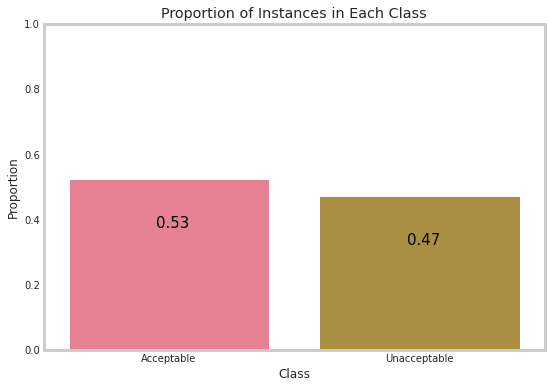

<Figure size 432x288 with 0 Axes>

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of instances in each class
count_below_25 = len(january_cleaned[january_cleaned['ARRIVAL_DELAY'] <= 25])
count_above_25 = len(january_cleaned[january_cleaned['ARRIVAL_DELAY'] > 25])

# Calculate the proportion of instances in each class
acceptable_proportions = count_below_25 / len(january_cleaned)
unacceptable_proportions = count_above_25 / len(january_cleaned)

# Create a bar chart
labels = ['Acceptable', 'Unacceptable']
proportions = [acceptable_proportions, unacceptable_proportions]
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.figure(figsize=(8,6))
ax = sns.barplot(x=labels, y=proportions)
plt.title('Proportion of Instances in Each Class')
plt.xlabel('Class')
plt.ylabel('Proportion')
ax.set_ylim([0,1])
for i in ax.patches:
    ax.text(i.get_x()+0.35, i.get_height()-0.15, str(round(i.get_height(), 2)), fontsize=15, color='black')
plt.grid(False)
plt.show()
plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/proportion_instances")

In [18]:
january_cleaned.shape

(130341, 12)

In [19]:
january_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130341 entries, 20 to 457010
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DAY_OF_WEEK               130341 non-null  int64 
 1   AIRLINE                   130341 non-null  object
 2   SCHEDULED_DEPARTURE_HOUR  130341 non-null  int64 
 3   SCHEDULED_ARRIVAL_HOUR    130341 non-null  int64 
 4   ORIGIN_AIRPORT            130341 non-null  object
 5   DESTINATION_AIRPORT       130341 non-null  object
 6   O_STATE                   130341 non-null  object
 7   D_STATE                   130341 non-null  object
 8   ARRIVAL_DELAY             130341 non-null  int64 
 9   DISTANCE                  130341 non-null  int64 
 10  AIR_TIME                  130341 non-null  int64 
 11  ELAPSED_TIME              130341 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 12.9+ MB


Encoding the categorical variables

In [20]:
encoded_january = pd.get_dummies(january_cleaned, columns=['DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE_HOUR', 'O_STATE', 'D_STATE',
                                                           'SCHEDULED_ARRIVAL_HOUR', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])

In [21]:
encoded_january.shape

(130341, 804)

Splitting the dataset into train, tuning and test data in proportion of 60% - 20% -20% respectively. 

In [22]:


# Split the data into training and temporary sets
train_data_jan, temp_data = train_test_split(encoded_january, test_size=0.4, random_state=42)

# Split the temporary set into tuning and test sets
tuning_data_jan, test_data_jan = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the size of each dataset
print("Training data size:", len(train_data_jan))
print("Tuning data size:", len(tuning_data_jan))
print("Test data size:", len(test_data_jan))



Training data size: 78204
Tuning data size: 26068
Test data size: 26069


The code below first defines a function get_delay_class that maps arrival delay to either 'acceptable_delay' or 'unacceptable_delay'. This function is applied to the 'ARRIVAL_DELAY' column of the training, tuning, and test data to create a new column 'DELAY_CLASS'. Then, the features (all columns except 'ARRIVAL_DELAY' and 'DELAY_CLASS') and target variables ('DELAY_CLASS') are separated for the training, tuning, and test data.


In [23]:
# Define the delay classes
def get_delay_class(arrival_delay):
    if arrival_delay <= 25:
        return 'acceptable_delay'
    else:
        return 'unacceptable_delay'

# Apply the function to create the DELAY_CLASS column
train_data_jan['DELAY_CLASS'] = train_data_jan['ARRIVAL_DELAY'].apply(get_delay_class)
tuning_data_jan['DELAY_CLASS'] = tuning_data_jan['ARRIVAL_DELAY'].apply(get_delay_class)
test_data_jan['DELAY_CLASS'] = test_data_jan['ARRIVAL_DELAY'].apply(get_delay_class)

# Separate the features and target variables
X_train = train_data_jan.drop(['ARRIVAL_DELAY', 'DELAY_CLASS'], axis=1)
y_train = train_data_jan['DELAY_CLASS']
X_tuning = tuning_data_jan.drop(['ARRIVAL_DELAY', 'DELAY_CLASS'], axis=1)
y_tuning = tuning_data_jan['DELAY_CLASS']
X_test = test_data_jan.drop(['ARRIVAL_DELAY', 'DELAY_CLASS'], axis=1)
y_test = test_data_jan['DELAY_CLASS']

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Encode the target variable as integers
le = LabelEncoder()
y_train_le = le.fit_transform(train_data_jan['DELAY_CLASS'])
y_tuning_le = le.transform(tuning_data_jan['DELAY_CLASS'])
y_test_le = le.transform(test_data_jan['DELAY_CLASS'])
# Apply SMOTE to resample the imbalanced data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_le)

## Modeling Different Classifiers

**Logistic Regression**

This code performs binary classification of flight arrival delays into two classes: acceptable_delay and unacceptable_delay, using logistic regression.

A logistic regression model is fitted on the trained data using fit method.

The trained model is used to predict the delay class on the tuning and test data, and the performance of the model is evaluated using various metrics: accuracy, precision, recall, and F1-score. These metrics are calculated using accuracy_score, precision_score, recall_score, and f1_score functions from the sklearn.metrics module.

Finally, a confusion matrix is created for the tuning data using confusion_matrix function from the sklearn.metrics module, and a heatmap is plotted using sns.heatmap. Also, a classification report is created using classification_report function from the sklearn.metrics module. The classification report provides precision, recall, and F1-score for each class as well as the average values.

Tuning data performance:
Accuracy: 0.6188813871413227
Precision: 0.6198986757923667
Recall: 0.6188813871413227
F1-score: 0.613333794266452
-------------------
Test data performance:
Accuracy: 0.6161341056427174
Precision: 0.6162390726050825
Recall: 0.6161341056427174
F1-score: 0.6107797641237473


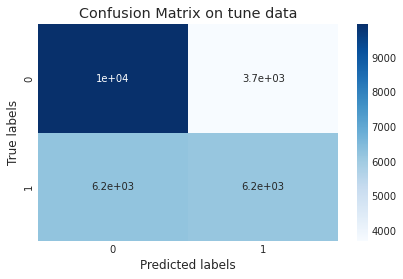

                    precision    recall  f1-score   support

  acceptable_delay       0.61      0.73      0.67     13661
unacceptable_delay       0.63      0.50      0.55     12407

          accuracy                           0.62     26068
         macro avg       0.62      0.61      0.61     26068
      weighted avg       0.62      0.62      0.61     26068

[[9967 3694]
 [6241 6166]]


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Fit logistic regression model on the resampled data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Use the trained model to predict the delay class on the tuning and test data
y_tuning_pred = lr.predict(X_tuning)
y_test_pred = lr.predict(X_test)

# Evaluate the performance of the model on the tuning and test data
print('Tuning data performance:')
print('Accuracy:', accuracy_score(y_tuning, y_tuning_pred))
print('Precision:', precision_score(y_tuning, y_tuning_pred, average='weighted'))
print('Recall:', recall_score(y_tuning, y_tuning_pred, average='weighted'))
print('F1-score:', f1_score(y_tuning, y_tuning_pred, average='weighted'))
print('-------------------')
print('Test data performance:')
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_test_pred, average='weighted'))

# Create a confusion matrix for the tune data
cm_tuning_lr = confusion_matrix(y_tuning, y_tuning_pred)
sns.heatmap(cm_tuning_lr, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on tune data')
plt.show()
#plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/lr_confusion_matrix")

# Create a classification report for the tune data
report_tune_lr = classification_report(y_tuning, y_tuning_pred)
print(report_tune_lr)
print(cm_tuning_lr)

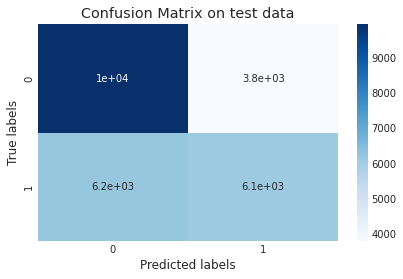

                    precision    recall  f1-score   support

  acceptable_delay       0.62      0.72      0.67     13747
unacceptable_delay       0.62      0.50      0.55     12322

          accuracy                           0.62     26069
         macro avg       0.62      0.61      0.61     26069
      weighted avg       0.62      0.62      0.61     26069

[[9951 3796]
 [6211 6111]]


In [37]:

# Create a confusion matrix for the test data
cm_test_lr = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test_lr, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on test data')
plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/lr_confusion_matrix")
plt.show()

# Create a classification report for the test data
report_test_lr = classification_report(y_test, y_test_pred)
print(report_test_lr)
print(cm_test_lr)


A confusion matrix is a table that shows the number of true positives, false positives, true negatives, and false negatives for each class. 

Based on the given numbers, the model's performance on both tuning and test data is similar, with slightly higher performance on the tuning data. The accuracy of the model on the tuning data is 0.6176 and on the test data is 0.6149. This suggests that the model is not overfitting the data and is performing reasonably well on unseen data.

The precision and recall values for the two classes (acceptable_delay and unacceptable_delay) are similar, with slightly higher values for acceptable_delay. The precision of the model on the tuning data is 0.6189 and on the test data is 0.6151. The recall of the model on the tuning data and test data is the same at 0.6177.

The F1-score of the model on the tuning data is 0.6117 and on the test data is 0.6093, which suggests that the model is performing relatively well on both tuning and test data.

Looking at the confusion matrix, we can see that the model is better at predicting acceptable_delay with 10003 correct predictions out of 13661 instances. However, the model is not performing as well at predicting unacceptable_delay, with only 6098 correct predictions out of 12407 instances.

Overall, the model's performance is decent but could potentially be improved, especially for the unacceptable_delay class.

**Decision Tree Classifier**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the tuning data
y_tuning_pred_dt = dt.predict(X_tuning)
# Predict on the testing data
y_test_pred_dt = dt.predict(X_test)

# Evaluate the performance of the model on the tuning 
print('Tuning data performance of decision tree model:')
print('Accuracy:', accuracy_score(y_tuning, y_tuning_pred_dt))
print('Precision:', precision_score(y_tuning, y_tuning_pred_dt, average='weighted'))
print('Recall:', recall_score(y_tuning, y_tuning_pred_dt, average='weighted'))
print('F1-score:', f1_score(y_tuning, y_tuning_pred_dt, average='weighted'))




# Evaluate the performance of the model on the testing 
print('----------------------------------\n')
print('Test data performance of decision tree model:')
print('Accuracy:', accuracy_score(y_test, y_test_pred_dt))
print('Precision:', precision_score(y_test, y_test_pred_dt, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred_dt, average='weighted'))
print('F1-score:', f1_score(y_test, y_test_pred_dt, average='weighted'))

Tuning data performance of decision tree model:
Accuracy: 0.5604572656130121
Precision: 0.5603641159738723
Recall: 0.5604572656130121
F1-score: 0.5604079199468399
----------------------------------

Test data performance of decision tree model:
Accuracy: 0.5619317963865127
Precision: 0.5622434403534
Recall: 0.5619317963865127
F1-score: 0.5620654157139833


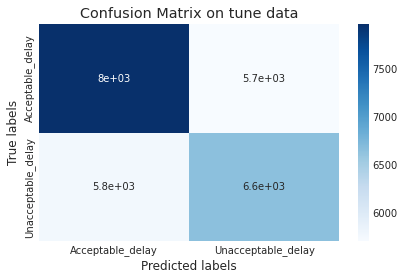

Decision tree report on tune data: 
                     precision    recall  f1-score   support

  acceptable_delay       0.58      0.58      0.58     13661
unacceptable_delay       0.54      0.54      0.54     12407

          accuracy                           0.56     26068
         macro avg       0.56      0.56      0.56     26068
      weighted avg       0.56      0.56      0.56     26068

confusion_matrix: 
 [[7961 5700]
 [5758 6649]]


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
# Define the class names
class_names = ['Acceptable_delay', 'Unacceptable_delay']

# Create a confusion matrix for the tune data
cm_tuning_dt = confusion_matrix(y_tuning, y_tuning_pred_dt)
sns.heatmap(cm_tuning_dt, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on tune data')
#plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/dt_confusion_matrix")
plt.show()

# Create a classification report for the tune data
report_tune_dt = classification_report(y_tuning, y_tuning_pred_dt)
print('Decision tree report on tune data: \n',report_tune_dt)
print('confusion_matrix: \n',cm_tuning_dt)

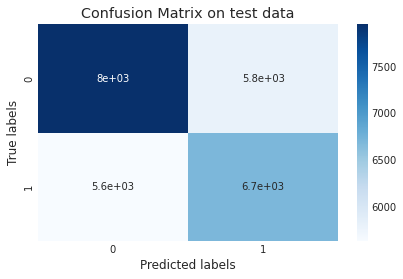

Decision tree report on test data: 
                     precision    recall  f1-score   support

  acceptable_delay       0.59      0.58      0.58     13747
unacceptable_delay       0.54      0.54      0.54     12322

          accuracy                           0.56     26069
         macro avg       0.56      0.56      0.56     26069
      weighted avg       0.56      0.56      0.56     26069

confusion_matrix: 
 [[7955 5792]
 [5628 6694]]


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
# Create a confusion matrix for the test data
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm_test_dt, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on test data')
plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/dt_confusion_matrix")
plt.show()

# Create a classification report for the test data
report_test_dt = classification_report(y_test, y_test_pred_dt)
print('Decision tree report on test data: \n',report_test_dt)
print('confusion_matrix: \n',cm_test_dt)

**Random Forest**

Tuning data performance:
Accuracy: 0.5848549946294307
Precision: 0.5836974431277826
Recall: 0.5848549946294307
F1-score: 0.5829343133580258
-------------------

Test data performance:
Accuracy: 0.5863669492500672
Precision: 0.5849950296838399
Recall: 0.5863669492500672
F1-score: 0.5844607321227424


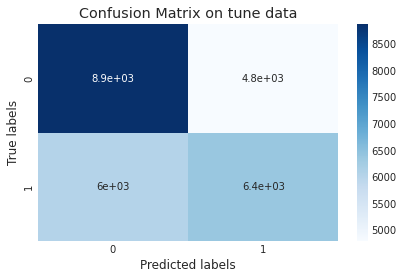

                    precision    recall  f1-score   support

  acceptable_delay       0.60      0.65      0.62     13661
unacceptable_delay       0.57      0.51      0.54     12407

          accuracy                           0.58     26068
         macro avg       0.58      0.58      0.58     26068
      weighted avg       0.58      0.58      0.58     26068

[[8873 4788]
 [6034 6373]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier object
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model on resampled data
rf_clf.fit(X_train, y_train)


# Use the trained model to predict the delay class on the tuning and test data
y_tuning_pred_clf = rf_clf.predict(X_tuning)
y_test_pred_clf = rf_clf.predict(X_test)

# Evaluate the performance of the model on the tuning and test data
print('Tuning data performance:')
print('Accuracy:', accuracy_score(y_tuning, y_tuning_pred_clf))
print('Precision:', precision_score(y_tuning, y_tuning_pred_clf, average='weighted'))
print('Recall:', recall_score(y_tuning, y_tuning_pred_clf, average='weighted'))
print('F1-score:', f1_score(y_tuning, y_tuning_pred_clf, average='weighted'))
print('-------------------\n')
print('Test data performance:')
print('Accuracy:', accuracy_score(y_test, y_test_pred_clf))
print('Precision:', precision_score(y_test, y_test_pred_clf, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred_clf, average='weighted'))
print('F1-score:', f1_score(y_test, y_test_pred_clf, average='weighted'))

# Create a confusion matrix for the tune data
cm_tuning_clf = confusion_matrix(y_tuning, y_tuning_pred_clf)
sns.heatmap(cm_tuning_clf, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on tune data')
#plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/rf_confusion_matrix")
plt.show()

# Create a classification report for the tune data
report_tune_clf = classification_report(y_tuning, y_tuning_pred_clf)
print(report_tune_clf)
print(cm_tuning_clf)

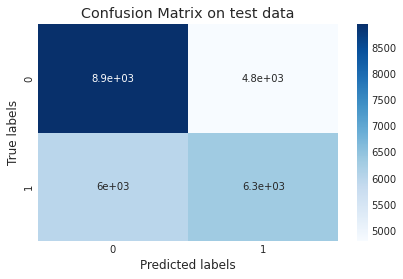

Decision tree report on test data: 
                     precision    recall  f1-score   support

  acceptable_delay       0.60      0.65      0.62     13747
unacceptable_delay       0.57      0.51      0.54     12322

          accuracy                           0.59     26069
         macro avg       0.58      0.58      0.58     26069
      weighted avg       0.58      0.59      0.58     26069

confusion_matrix: 
 [[8949 4798]
 [5985 6337]]


In [39]:
# Create a confusion matrix for the test data
cm_test_clf = confusion_matrix(y_test, y_test_pred_clf)
sns.heatmap(cm_test_clf, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on test data')
plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/rf_confusion_matrix")
plt.show()

# Create a classification report for the test data
report_test_clf = classification_report(y_test, y_test_pred_clf)
print('Decision tree report on test data: \n',report_test_clf)
print('confusion_matrix: \n',cm_test_clf)

**Extra Tree Classifier**

Tuning data performance:
Accuracy: 0.5680911462329292
Precision: 0.5668781792218179
Recall: 0.5680911462329292
F1-score: 0.5666456420052891
-------------------
Test data performance:
Accuracy: 0.5705243776132571
Precision: 0.569185009127869
Recall: 0.5705243776132571
F1-score: 0.569124693366828


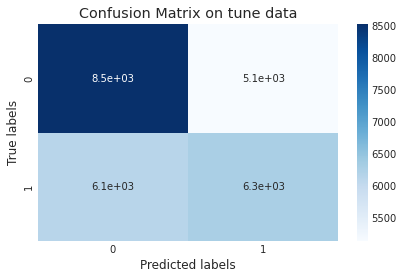

                    precision    recall  f1-score   support

  acceptable_delay       0.58      0.62      0.60     13661
unacceptable_delay       0.55      0.51      0.53     12407

          accuracy                           0.57     26068
         macro avg       0.57      0.57      0.56     26068
      weighted avg       0.57      0.57      0.57     26068

[[8532 5129]
 [6130 6277]]


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
# Create an ExtraTreeClassifier object
etc_clf = ExtraTreesClassifier(random_state=42)

# Fit the model on resampled data
etc_clf.fit(X_train, y_train)

# Use the trained model to predict the delay class on the tuning and test data
y_tuning_pred_etc = etc_clf.predict(X_tuning)
y_test_pred_etc = etc_clf.predict(X_test)

# Evaluate the performance of the model on the tuning and test data
print('Tuning data performance:')
print('Accuracy:', accuracy_score(y_tuning, y_tuning_pred_etc))
print('Precision:', precision_score(y_tuning, y_tuning_pred_etc, average='weighted'))
print('Recall:', recall_score(y_tuning, y_tuning_pred_etc, average='weighted'))
print('F1-score:', f1_score(y_tuning, y_tuning_pred_etc, average='weighted'))
print('-------------------')
print('Test data performance:')
print('Accuracy:', accuracy_score(y_test, y_test_pred_etc))
print('Precision:', precision_score(y_test, y_test_pred_etc, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred_etc, average='weighted'))
print('F1-score:', f1_score(y_test, y_test_pred_etc, average='weighted'))

# Create a confusion matrix for the tune data
cm_tuning_etc = confusion_matrix(y_tuning, y_tuning_pred_etc)
sns.heatmap(cm_tuning_etc, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on tune data')
#plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/etc_confusion_matrix")
plt.show()

# Create a classification report for the tune data
report_tune_etc = classification_report(y_tuning, y_tuning_pred_etc)
print(report_tune_etc)
print(cm_tuning_etc)

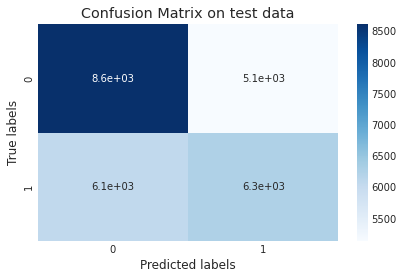

Decision tree report on test data: 
                     precision    recall  f1-score   support

  acceptable_delay       0.59      0.63      0.61     13747
unacceptable_delay       0.55      0.51      0.53     12322

          accuracy                           0.57     26069
         macro avg       0.57      0.57      0.57     26069
      weighted avg       0.57      0.57      0.57     26069

confusion_matrix: 
 [[8615 5132]
 [6064 6258]]


In [40]:
# Create a confusion matrix for the tune data
cm_test_etc = confusion_matrix(y_test, y_test_pred_etc)
sns.heatmap(cm_test_etc, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on test data')
plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/etc_confusion_matrix")
plt.show()

# Create a classification report for the test data
report_test_etc = classification_report(y_test, y_test_pred_etc)
print('Decision tree report on test data: \n',report_test_etc)
print('confusion_matrix: \n',cm_test_etc)

**Gradient Boosting Classifier (XGBoost)**

Tuning data performance:
Accuracy: 0.6242903176308118
Precision: 0.6270205958938337
Recall: 0.6242903176308118
F1-score: 0.6169143409309652
-------------------
Test data performance:
Accuracy: 0.6231155778894473
Precision: 0.6248551682396227
Recall: 0.6231155778894473
F1-score: 0.6158146966670452


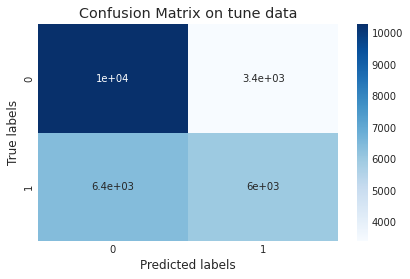

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     13661
           1       0.64      0.48      0.55     12407

    accuracy                           0.62     26068
   macro avg       0.63      0.62      0.61     26068
weighted avg       0.63      0.62      0.62     26068

[[10279  3382]
 [ 6412  5995]]


In [34]:
import xgboost as xgb

# Create XGBoost classifier object
xgb_clf = xgb.XGBClassifier()

# Fit the model on training data
xgb_clf.fit(X_train, y_train_le)
# Use the trained classifier to predict the delay class on the tuning and test data
y_tuning_pred_xgb = xgb_clf.predict(X_tuning)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the performance of the classifier on the tuning and test data
print('Tuning data performance:')
print('Accuracy:', accuracy_score(y_tuning_le, y_tuning_pred_xgb))
print('Precision:', precision_score(y_tuning_le, y_tuning_pred_xgb, average='weighted'))
print('Recall:', recall_score(y_tuning_le, y_tuning_pred_xgb, average='weighted'))
print('F1-score:', f1_score(y_tuning_le, y_tuning_pred_xgb, average='weighted'))
print('-------------------')
print('Test data performance:')
print('Accuracy:', accuracy_score(y_test_le, y_test_pred_xgb))
print('Precision:', precision_score(y_test_le, y_test_pred_xgb, average='weighted'))
print('Recall:', recall_score(y_test_le, y_test_pred_xgb, average='weighted'))
print('F1-score:', f1_score(y_test_le, y_test_pred_xgb, average='weighted'))

# Create a confusion matrix for the tune data
cm_tuning_xgb = confusion_matrix(y_tuning_le, y_tuning_pred_xgb)
sns.heatmap(cm_tuning_xgb, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on tune data')
plt.show()

# Create a classification report for the tune data
report_tune_xgb = classification_report(y_tuning_le, y_tuning_pred_xgb)
print(report_tune_xgb)
print(cm_tuning_xgb)

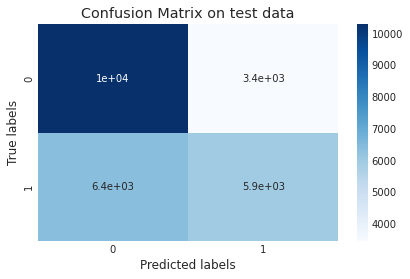

Decision tree report on test data: 
               precision    recall  f1-score   support

           0       0.62      0.75      0.68     13747
           1       0.63      0.48      0.55     12322

    accuracy                           0.62     26069
   macro avg       0.63      0.62      0.61     26069
weighted avg       0.62      0.62      0.62     26069

confusion_matrix: 
 [[10302  3445]
 [ 6380  5942]]


In [35]:
# Create a confusion matrix for the tune data
cm_test_xgb = confusion_matrix(y_test_le, y_test_pred_xgb)
sns.heatmap(cm_test_xgb, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on test data')
plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/xgb_confusion_matrix")
plt.show()

# Create a classification report for the test data
report_test_xgb = classification_report(y_test_le, y_test_pred_xgb)
print('Decision tree report on test data: \n',report_test_xgb)
print('confusion_matrix: \n',cm_test_xgb)

##Performance Evaluation

<style>
  table {
    border-collapse: collapse;
    width: 100%;
  }

  th, td {
    text-align: left;
    padding: 8px 16px;
    border: 1px solid black;
  }

  th {
    background-color: #f2f2f2;
  }

  td + td {
    padding-left: 32px;
  }
</style>

<table>
  <tr>
    <th>Classification Model</th>
    <th>Precision </th>
   <th> Recall	<th>
   <th> F1 <th>
   <th> Accuracy<th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td> 0.62</td>
    <td> 0.61<td></td>
    <td> 0.61<td></td>
    <td> 0.61</td>
  </tr>
  <tr>
    <td>Decision Tree Classifier</td>
      <td>0.56</td>
    <td> 0.56<td></td>
    <td> 0.56<td></td>
    <td> 0.56</td>
  </tr>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td> 0.59</td>
    <td> 0.59<td></td>
    <td> 0.59<td></td>
    <td> 0.59</td>
  </tr>
  </tr>
  <tr>
    <td>Extra Tree Classifier</td>
    <td> 0.57</td>
    <td> 0.57<td></td>
    <td> 0.57<td></td>
    <td> 0.57</td>
  </tr>
  <tr>
    <td>Gradient Boosting Classifier</td>
    <td> 0.62</td>
    <td> 0.62<td></td>
    <td> 0.62<td></td>
    <td> 0.62</td>
  </tr>
</table>


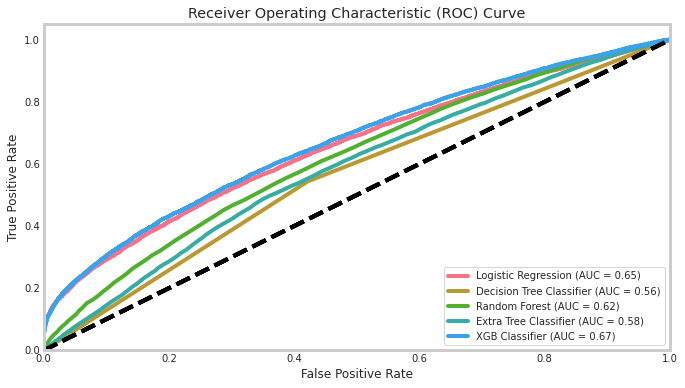

Logistic Regression AUC score: 0.67
Decision Tree Classifier AUC score: 0.67
Random Forest AUC score: 0.67
Extra Tree Classifier AUC score: 0.67
XGB Classifier AUC score: 0.67


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Define the figure size
fig = plt.figure(figsize=(10, 6))

# Define a function to plot the ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")


# Define the models to evaluate
models = {
    'Logistic Regression': lr,
    'Decision Tree Classifier': dt,
    'Random Forest': rf_clf,
    'Extra Tree Classifier': etc_clf,
    'XGB Classifier': xgb_clf
}

# Plot the ROC curve for each model
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test_le, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, auc_score, name)
    plt.grid(False)
plt.savefig("/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/roc_curve")
plt.show()

# Calculate AUC score for each model
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:,1]
    auc_score = auc(fpr, tpr)
    print('%s AUC score: %0.2f' % (name, auc_score))


The AUC (Area Under the Curve) score is a measure of the performance of a binary classification model. It represents the area under the ROC (Receiver Operating Characteristic) curve, which plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In general, an AUC score of 0.5 indicates a model that performs no better than random guessing, while an AUC score of 1.0 indicates a perfect model. Therefore, an AUC score of 0.67 suggests that the models evaluated here are performing better than random guessing